In [21]:
## bibliotecas necessarias
import librosa 
import matplotlib.pyplot as plt 
import numpy as np
from IPython.display import Audio # play audio, funciona apenas no jupyter
import pyaudio
import wave
import PySimpleGUI as sg

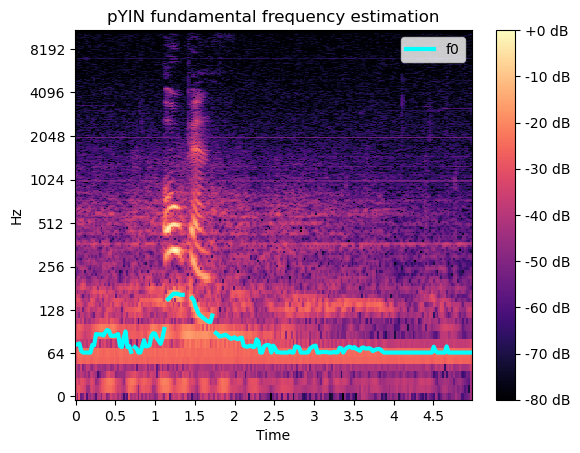

In [22]:
# lendo arquivo exemplo
filename = f'C:/Users/Matheus/Desktop/Engenharia Unifica II/Speaker Identification 2/Media_Base1/audio_24.wav'
sr = 22000
y, sr = librosa.load(filename, sr=sr)
Audio(data=y, rate=sr)

f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), # calc f0
                                                    fmax=librosa.note_to_hz('C7'))

times = librosa.times_like(f0)

# plot do espectro ao longo do tempo e destaque na F0

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

In [23]:
# array para tirar uma media da freq. f0 do usuário
m0_arr = []

# lendo os arquivos em sequencia
for i in range(1,40):
    filename = f'C:/Users/Matheus/Desktop/Engenharia Unifica II/Speaker Identification 2/Media_Base1/audio_{i}.wav'
    sr = 22000 # taxa de amostragem para ler o audio
    y, sr = librosa.load(filename, sr=sr)

    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), # calc f0
                                                    fmax=librosa.note_to_hz('C7'))

    m0 = np.nanmean(f0) # calculando a f0 media para cada audio
    m0_arr.append(m0) # salvando no array

In [24]:
m0_arr = np.array(m0_arr) # transformando em numpy array

In [25]:
m0 = np.round(m0_arr.mean(), 2) # calculando media de f0 para todos os usuário (estimando oa f0 do usuário)
s0 = np.round(m0_arr.std(), 2) # calculando o desvio das amostras
print(m0, s0)

70.36 2.21


In [32]:
# Testando modelo proposto
import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = f'C:/Users/Matheus/Desktop/Engenharia Unifica II/Speaker Identification 2/Media_Tester/audio.wav'

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

filename = f'C:/Users/Matheus/Desktop/Engenharia Unifica II/Speaker Identification 2/Media_Tester/audio.wav'
sr = 22000
y, sr = librosa.load(filename, sr=sr)
Audio(data=y, rate=sr)

f0, voiced_flag, voiced_probs = librosa.pyin(y,
                                            fmin=librosa.note_to_hz('C2'),
                                            fmax=librosa.note_to_hz('C7'))
m = np.nanmean(f0)
if not np.isnan(m):
    print(filename, m)
    if ((m0 - s0) <= m) and (m <= (m0 + s0)):
        sg.theme('Reddit')   # Add a touch of color
        # All the stuff inside your window.
        layout = [  [sg.Text('User recognized!')],                    
                    [sg.Text('Listened frequency:')], [sg.Text(m)],
                    [sg.Button('Back')] ]
        # Create the Window
        window = sg.Window('Speaker Recognization', layout)
        # Event Loop to process "events" and get the "values" of the inputs
        while True:
            event, values = window.read()
            if event == sg.WIN_CLOSED or event == 'Back': # if user closes window or clicks cancel
                break 
        window.close()
    else:
        sg.theme('Reddit')   # Add a touch of color
        # All the stuff inside your window.
        layout = [  [sg.Text('User not recognized!')],            
                    [sg.Button('Back')] ]
        # Create the Window
        window = sg.Window('Speaker Recognization', layout)
        # Event Loop to process "events" and get the "values" of the inputs
        while True:
            event, values = window.read()
            if event == sg.WIN_CLOSED or event == 'Back': # if user closes window or clicks cancel
                break 
        window.close()

* recording
* done recording
C:/Users/Matheus/Desktop/Engenharia Unifica II/Speaker Identification 2/Media_Tester/audio.wav 70.08543755061409
